In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
import os
os.getcwd()

'C:\\Users\\smart'

# **Import data and prepare data**

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [5]:
df.drop_duplicates(inplace=True)
df.info()
cat_col = [0, 1, 2,4,5,6,7,8,9,10,11,12,13,15,16,18]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
for col in cat_col:
    df.iloc[:,col] =df.iloc[:,col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Nacionality                                     4424 non-null   category
 7   Mother's qualification                          4424 non-null   category
 8   Father's qualification                          4424 non-null   category
 9   Mother's occupation           

In [7]:
df = df[df["Target"]!="Enrolled"]
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [9]:
df['Target']=df['Target'].apply(lambda x: 1 if x=='Graduate' else 0)

In [10]:
df['Target']

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

# **Logistic Regression Model and Accuracy**

In [11]:
X=df.drop('Target', axis=1)
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [12]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Course,Tuition fees up to date,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Father's occupation_43,Father's occupation_44,Father's occupation_45,Father's occupation_46,Displaced_1,Educational special needs_1,Debtor_1,Gender_1,Scholarship holder_1,International_1
0,2,1,20,0,0,0,0,0.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
1,11,0,19,0,6,6,6,14.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
2,5,0,19,0,6,0,0,0.000000,0,0,...,0,0,0,0,1,0,0,1,0,0
3,15,1,20,0,6,8,6,13.428571,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,1,45,0,6,9,5,12.333333,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Y=df['Target']

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
std = MinMaxScaler()
X=std.fit_transform(X)
X[0]

array([0.0625    , 1.        , 0.05660377, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.37209302, 0.48888889, 0.7661823 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.33, random_state=42)

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [230]:
predictions=logmodel.predict(X_test)

In [231]:
predictions

array(['Graduate', 'Dropout', 'Dropout', ..., 'Graduate', 'Graduate',
       'Graduate'], dtype=object)

In [232]:
from sklearn.metrics import classification_report

In [233]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

     Dropout       0.93      0.80      0.86       467
    Graduate       0.88      0.96      0.92       731

    accuracy                           0.90      1198
   macro avg       0.90      0.88      0.89      1198
weighted avg       0.90      0.90      0.90      1198



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
logmodel1=RandomForestClassifier()
logmodel1.fit(X_train, Y_train)

RandomForestClassifier()

In [20]:
predictions1=logmodel1.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(Y_test, predictions1))

              precision    recall  f1-score   support

     Dropout       0.93      0.82      0.87       467
    Graduate       0.89      0.96      0.92       731

    accuracy                           0.90      1198
   macro avg       0.91      0.89      0.90      1198
weighted avg       0.91      0.90      0.90      1198



In [23]:
from xgboost import XGBClassifier

In [24]:
bst = XGBClassifier(n_estimators=100)
# fit model
bst.fit(X_train, Y_train)
# make predictions
preds = bst.predict(X_test)

In [25]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       467
           1       0.91      0.95      0.93       731

    accuracy                           0.91      1198
   macro avg       0.91      0.90      0.90      1198
weighted avg       0.91      0.91      0.91      1198



In [182]:

imp = pd.DataFrame(index=logmodel1.feature_names_in_, columns=['values'])

In [183]:
imp['values']=logmodel1.feature_importances_

In [184]:
imp.head()

,values
Marital status,0.002074
Application mode,0.019625
Application order,0.011800
Course,0.026430
Daytime/evening attendance,0.002285


In [185]:
import seaborn as sns

In [186]:
db = imp.sort_values(by='values', ascending=False)[:10]
db

,values
Curricular units 2nd sem (approved),0.225078
Curricular units 2nd sem (grade),0.129219
Curricular units 1st sem (approved),0.122548
Curricular units 1st sem (grade),0.066236
Tuition fees up to date,0.058464
Age at enrollment,0.036082
Curricular units 2nd sem (evaluations),0.033399
Curricular units 1st sem (evaluations),0.029690
Course,0.026430
Father's occupation,0.022158


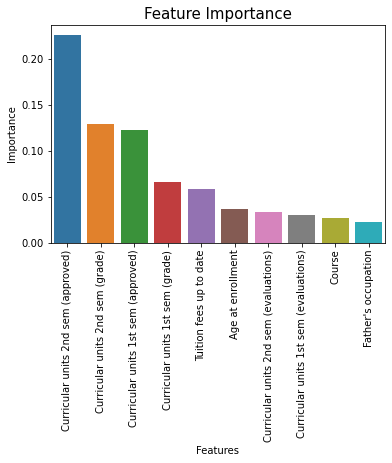

In [187]:
sns.barplot(x=db.index, y=db['values'])
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=15)
plt.xlabel("Features")
plt.ylabel('Importance')
plt.savefig('Feature_Importance.png')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix

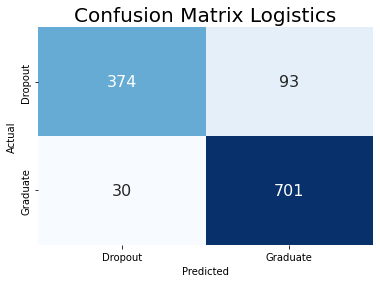

In [234]:
preds = logmodel.predict(X_test)
sns.heatmap(confusion_matrix(Y_test, preds), cmap='Blues', fmt='g',annot=True, cbar=False, annot_kws={'fontsize':16})
plt.xticks(ticks=[0.5, 1.5], labels=['Dropout', 'Graduate'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistics', fontsize=20)
plt.savefig('Confusion_Matrix.png')
plt.show()

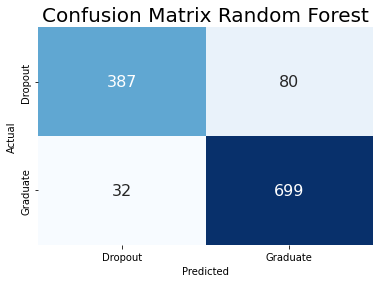

In [249]:
preds = logmodel1.predict(X_test)
sns.heatmap(confusion_matrix(Y_test, preds), cmap='Blues', fmt='g',annot=True, cbar=False, annot_kws={'fontsize':16})
plt.xticks(ticks=[0.5, 1.5], labels=['Dropout', 'Graduate'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest', fontsize=20)
plt.savefig('Confusion_Matrix.png')
plt.show()

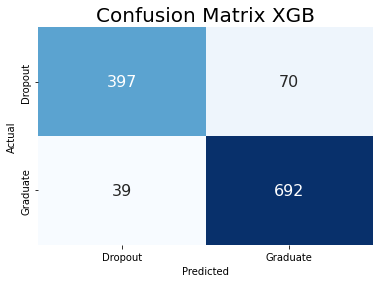

In [28]:
preds = bst.predict(X_test)
sns.heatmap(confusion_matrix(Y_test, preds), cmap='Blues', fmt='g',annot=True, cbar=False, annot_kws={'fontsize':16})
plt.xticks(ticks=[0.5, 1.5], labels=['Dropout', 'Graduate'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGB', fontsize=20)
plt.savefig('Confusion_MatrixXGB.png')
plt.show()

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_p = logmodel.predict(X_test)

In [68]:
Y_test

847     1
3927    0
524     0
223     1
3198    0
       ..
3885    1
4077    0
3375    1
4405    1
1320    1
Name: Target, Length: 1198, dtype: int64

In [72]:
fpr, tpr, threshold = roc_curve(Y_test, pred_p)
score = roc_auc_score(Y_test, pred_p)
score

0.8972470318738521

In [106]:
pred_p1 = logmodel.predict(X_test)
fpr1, tpr1, threshold1 = roc_curve(Y_test, pred_p1)
score1 = roc_auc_score(Y_test, pred_p1)
pred_p2 = bst.predict(X_test)
fpr2, tpr2, threshold2 = roc_curve(Y_test, pred_p2)
score2 = roc_auc_score(Y_test, pred_p2)

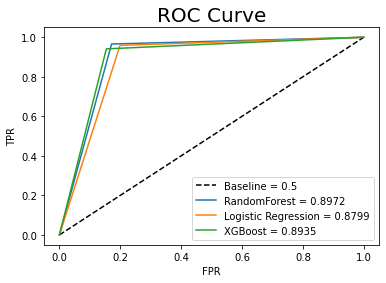

In [109]:
plt.plot([0, 1], [0,1], 'k--', label='Baseline = 0.5')
plt.plot(fpr,tpr, label = 'RandomForest = '+str(round(score, 4)))
plt.plot(fpr1,tpr1, label = 'Logistic Regression = '+str(round(score1, 4)))
plt.plot(fpr2,tpr2, label = 'XGBoost = '+str(round(score2, 4)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.title("ROC Curve", fontsize=20)
plt.savefig("ROC_Curve.png")
plt.show()

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
bst = MLPClassifier(hidden_layer_sizes=(2500))
# fit model
bst.fit(X_train, Y_train)
# make predictions
preds = bst.predict(X_test)

In [82]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

     Dropout       0.89      0.81      0.85       467
    Graduate       0.88      0.93      0.91       731

    accuracy                           0.88      1198
   macro avg       0.88      0.87      0.88      1198
weighted avg       0.88      0.88      0.88      1198



In [36]:
import tensorflow as tf
import tensorflow.keras as keras

In [59]:
df[list(df.select_dtypes(include = 'object').columns)] = df[list(df.select_dtypes(include = 'object').columns)].astype('string')

TARGET_FEATURE_NAME = "Target"
CATEGORICAL_FEATURES = list(df.select_dtypes(include = 'category').columns)
NUMERIC_FEATURES =  list(df.select_dtypes(exclude = 'category').columns)[1:]
FEATURE_NAMES = list(df.columns)

print(CATEGORICAL_FEATURES)
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    'Marital status': sorted(list(df['Marital status'].unique())),
    'Application mode': sorted(list(df['Application mode'].unique())),
    'Application order': sorted(list(df['Application order'].unique())),
    'Daytime/evening attendance': sorted(list(df['Daytime/evening attendance'].unique())),
    'Previous qualification': sorted(list(df['Previous qualification'].unique())),
    'Nacionality': sorted(list(df['Nacionality'].unique())),
    "Mother's qualification": sorted(list(df["Mother's qualification"].unique())),
    "Father's qualification": sorted(list(df["Father's qualification"].unique())),
    "Mother's occupation": sorted(list(df["Mother's occupation"].unique())),
     "Father's occupation": sorted(list(df[ "Father's occupation"].unique())),
    'Displaced': sorted(list(df['Displaced'].unique())),
    'Educational special needs': sorted(list(df['Educational special needs'].unique())),
    'Debtor': sorted(list(df['Debtor'].unique())),
    'Gender': sorted(list(df['Gender'].unique())),
    'Scholarship holder': sorted(list(df['Scholarship holder'].unique())),
    'International': sorted(list(df['International'].unique())),

}

['Marital status', 'Application mode', 'Application order', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Gender', 'Scholarship holder', 'International']


In [60]:
train,test = train_test_split(df,random_state = 42)
train.to_csv('train_dataset.csv',index = False, header = False)
test.to_csv('test_dataset.csv',index = False, header = False)

In [61]:
BATCH_SIZE = 64

train_ds = tf.data.experimental.make_csv_dataset("./train_dataset.csv",
                                                batch_size = BATCH_SIZE,
                                                column_names = FEATURE_NAMES,
                                                label_name = TARGET_FEATURE_NAME,
                                                num_epochs = 2,
                                                header = False,
                                                 shuffle = True
                                                )
test_ds = tf.data.experimental.make_csv_dataset("./test_dataset.csv",
                                                batch_size = BATCH_SIZE,
                                                column_names = FEATURE_NAMES,
                                                label_name = TARGET_FEATURE_NAME,
                                                num_epochs = 1,
                                                header = False,
                                                )

In [62]:
df_train, df_test= train_test_split(df, test_size=0.33, random_state=42)
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2157,1,15,1,6,1,14,1,22,14,10,...,1,6,7,6,13.142857,0,16.2,0.3,-0.92,1
3319,1,7,2,5,1,1,1,1,1,4,...,0,6,7,6,12.000000,0,9.4,-0.8,-3.12,1
3541,1,8,1,14,1,1,1,23,27,10,...,0,6,9,2,13.000000,0,10.8,1.4,1.74,0
3182,1,14,1,3,0,1,3,19,24,1,...,6,10,20,8,11.142857,0,9.4,-0.8,-3.12,1
2839,1,1,2,6,1,1,1,23,14,5,...,0,6,6,6,15.500000,0,8.9,1.4,3.51,1


In [63]:
def create_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURES:
            inputs[feature_name] = layers.Input(shape = (), dtype = tf.float32, name = feature_name)
        elif feature_name in CATEGORICAL_FEATURES:
            inputs[feature_name] = layers.Input(shape = (), dtype = tf.string, name = feature_name)
    return inputs

def encode_features(inputs):
    encoded_features = []
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURES:
            encoded_feature = tf.expand_dims(inputs[feature_name],-1)
        elif feature_name in CATEGORICAL_FEATURES:
            vocab = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            lookup = layers.StringLookup(vocabulary = vocab, output_mode = "one_hot")
            encoded_feature = lookup(inputs[feature_name])
        else:
            continue
        encoded_features.append(encoded_feature)
    
    return encoded_features

In [64]:
class NeuralDecisionTree(keras.Model):
    def __init__(self,depth,num_features,used_features_rate,num_classes):
        super(NeuralDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2**depth
        self.num_classes = num_classes
        self.step_counter = 1
        num_used_features = int(num_features * used_features_rate)
        one_hot = np.eye(num_features)
        sampled_feature_indices = np.random.choice(np.arange(num_features), num_used_features, replace = False)
        self.used_features_mask = one_hot[sampled_feature_indices]
        
        self.pi = tf.Variable(
        initial_value = tf.random_normal_initializer()(
        shape = [self.num_leaves,self.num_classes]),
            dtype = tf.float32,
            trainable = True)
        
        self.decision_fn = layers.Dense(units = self.num_leaves,
        activation = "sigmoid",name = "decision")
        
    def call(self,features):

        batch_size = tf.shape(features)[0]
        features = tf.matmul(
        features,self.used_features_mask,transpose_b = True)
       

        decisions = tf.expand_dims(
            self.decision_fn(features),axis = 2
        )

        decisions = layers.concatenate(
            [decisions,1-decisions], axis = 2
        )

        
        mu = tf.ones([batch_size,1,1])
        

        begin_idx = 1
        end_idx = 2

        
        for level in range(self.depth):
            mu = tf.reshape(mu,[batch_size,-1,1])
            mu = tf.tile(mu,(1,1,2))
            level_decisions = decisions[
                :,begin_idx:end_idx,:
            ]
            mu = mu * level_decisions
            begin_idx = end_idx
            end_idx = begin_idx + 2**(level+1)
        
        mu = tf.reshape(mu,[batch_size,self.num_leaves])
       

        probabilities = keras.activations.sigmoid(self.pi)
       
        outputs = tf.matmul(mu,probabilities)
        
    
        return outputs

In [66]:
import tensorflow.keras.layers as layers
neural_decision_params = {
    'depth' : 10,
'num_features' : 28,
'num_classes' : 2,
'used_features_rate' : 1.0}

inputs = create_inputs()
encoded_features = encode_features(inputs)
features = layers.concatenate(encoded_features)
outputs = NeuralDecisionTree(**neural_decision_params)(features)
neural_decision_tree_model = tf.keras.Model(inputs,outputs)

neural_decision_tree_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ["binary_accuracy"])

D:\python\lib\site-packages\numpy\core\numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
neural_decision_tree_model.fit(
    train_ds,epochs = 30,
    validation_data = test_ds,
    callbacks = [callback]

)

In [ ]:
neural_decision_tree_model.evaluate(test_ds)

# **PCA**

*Standardize data*

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(df)

StandardScaler()

In [20]:
scaled_data=scaler.transform(df)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=2)

In [23]:
pca.fit(scaled_data)

PCA(n_components=2)

In [24]:
component_matrix=pca.components_

In [25]:
first_component_loadings= component_matrix[0,:]
influential_columns_first_component=df.columns[np.abs(first_component_loadings).argsort()[::-1]]

In [26]:
second_component_loadings= component_matrix[1,:]
influential_columns_second_component=df.columns[np.abs(second_component_loadings).argsort()[::-1]]

In [27]:
influential_columns_second_component

Index(['Age at enrollment', 'Application mode', 'Target', 'Displaced',
       'Curricular units 2nd sem (grade)', 'Marital status',
       'Daytime/evening attendance', 'Previous qualification',
       'Application order', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (grade)', 'Tuition fees up to date',
       'Curricular units 2nd sem (credited)', 'Scholarship holder', 'Debtor',
       'Curricular units 2nd sem (approved)', 'Gender',
       'Curricular units 1st sem (evaluations)', 'Mother's qualification',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)', 'Father's qualification',
       'Course', 'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (enrolled)', 'GDP', 'Mother's occupation',
       'Unemployment rate', 'Educational special needs', 'Inflation rate',
       'Father's 

In [28]:
influential_columns_first_component

Index(['Curricular units 1st sem (approved)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (credited)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
       'Target', 'Tuition fees up to date', 'Gender', 'Application mode',
       'Course', 'Scholarship holder',
       'Curricular units 1st sem (without evaluations)', 'Debtor',
       'Previous qualification', 'Unemployment rate', 'Age at enrollment',
       'Father's qualification',
       'Curricular units 2nd sem (without evaluations)',
       'Mother's qualification', 'Mother's occupation',
       'Educational special needs', 'Daytime/evening attendance', 'Displaced',
       'Father's occupation', 'Marital status', 'Application order'

In [29]:
x_pca=pca.transform(scaled_data)

In [30]:
scaled_data.shape

(4424, 35)

In [31]:
x_pca.shape

(4424, 2)

Text(0, 0.5, 'Second principal component')

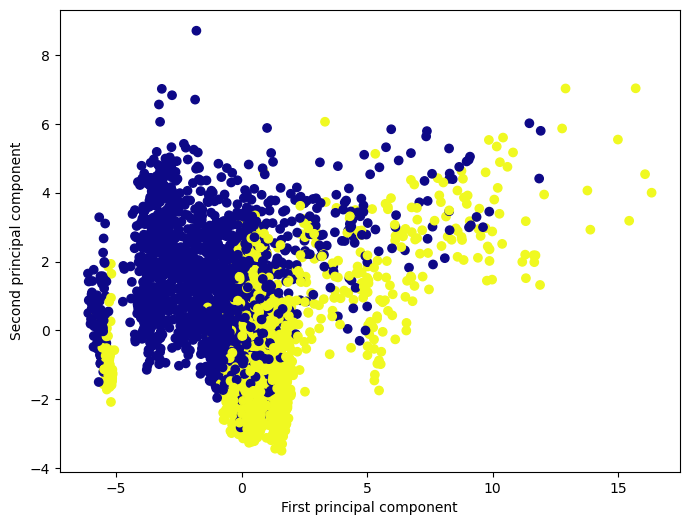

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [33]:
pca.components_

array([[ 8.46608156e-03,  4.23296734e-02, -7.76837801e-03,
         4.07501824e-02, -1.15525638e-02,  2.90003288e-02,
        -5.16831548e-03,  1.39345144e-02,  1.69019271e-02,
         1.24437930e-02,  8.70453582e-03, -8.71842185e-03,
        -1.23984784e-02, -3.62863018e-02,  8.78462568e-02,
        -6.91684336e-02,  3.97696749e-02,  1.85524420e-02,
        -2.09467679e-03,  2.84055658e-01,  3.50949175e-01,
         2.87519883e-01,  3.64979301e-01,  2.60532868e-01,
         3.84582254e-02,  2.83996771e-01,  3.42115893e-01,
         2.82375095e-01,  3.46170410e-01,  2.62545672e-01,
         1.51919524e-02,  2.20613659e-02, -2.04543364e-03,
        -3.91065213e-03,  1.50681262e-01],
       [ 2.23968276e-01,  3.25875161e-01, -2.13557296e-01,
        -9.00262074e-02, -2.18529976e-01,  2.15566167e-01,
        -9.81069645e-04,  1.30587536e-01,  9.24030627e-02,
         4.61707649e-02,  1.14463249e-02, -2.40645605e-01,
        -2.44375873e-02,  1.51816267e-01, -2.04230008e-01,
         1.48

In [34]:
df_comp=pd.DataFrame(pca.components_, columns=df.columns.tolist())

<Axes: >

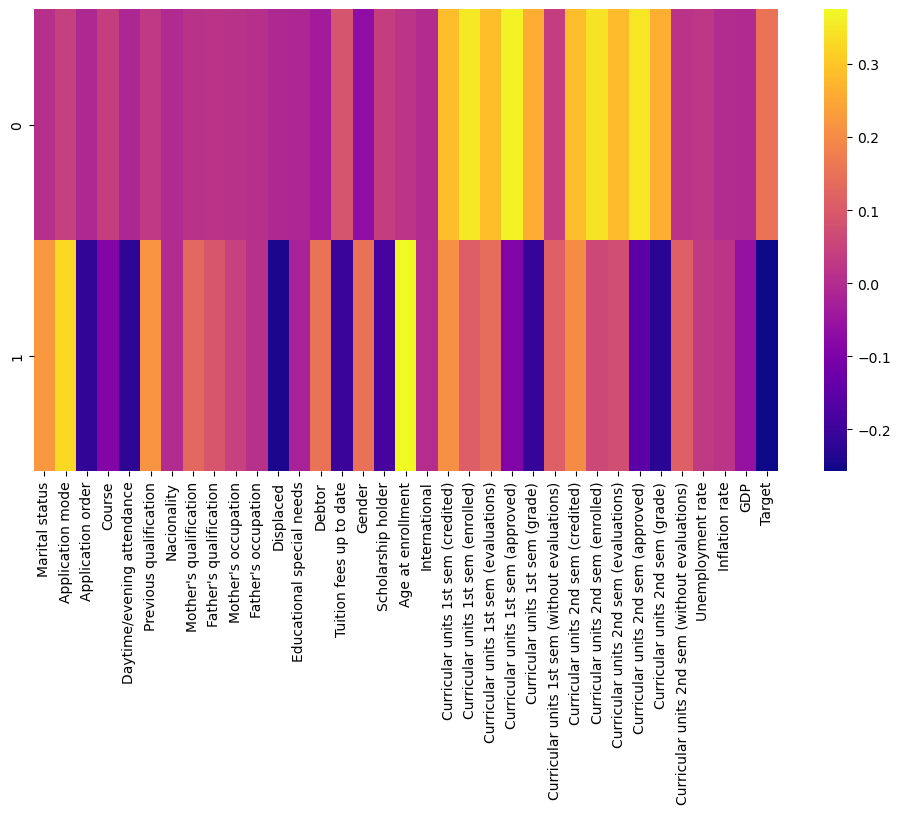

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

In [36]:
columns=influential_columns_first_component[0:5].tolist()

In [37]:
columns_to_add=influential_columns_second_component.tolist()

In [38]:
def add_unique_elements(first_list, second_list):
    # Add the first 5 unique elements from the first list to the second list
    for element in first_list:
        if element not in second_list and element !='Target':
            second_list.append(element)
        if len(second_list) == 10:
            break
    return second_list

In [39]:
final_columns=add_unique_elements(columns_to_add, columns)

In [40]:
final_columns.append('Target')

In [41]:
filtered_df=df[final_columns]

In [42]:
filtered_df.head()

,Curricular units 1st sem (approved),Curricular units 1st sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (enrolled),Curricular units 1st sem (evaluations),Age at enrollment,Application mode,Displaced,Curricular units 2nd sem (grade),Marital status,Target
0,0,0,0,0,0,20,8,1,0.000000,1,0
1,6,6,6,6,6,19,6,1,13.666667,1,1
2,0,6,0,6,0,19,1,1,0.000000,1,0
3,6,6,5,6,8,20,8,1,12.400000,1,1
4,5,6,6,6,9,45,12,0,13.000000,2,1


In [43]:
X_filtered=filtered_df.drop('Target', axis=1)

In [44]:
Y_filtered=filtered_df['Target']

In [45]:
X_train_f, X_test_f, Y_train_f, Y_test_f= train_test_split(X_filtered, Y_filtered, test_size=0.33, random_state=42)

In [46]:
logmodel_f=LogisticRegression()
logmodel_f.fit(X_train_f, Y_train_f)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions_f=logmodel_f.predict(X_test_f)

In [48]:
print(classification_report(Y_test_f, predictions_f))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       755
           1       0.79      0.88      0.83       705

    accuracy                           0.83      1460
   macro avg       0.83      0.83      0.83      1460
weighted avg       0.83      0.83      0.83      1460

